<a href="https://colab.research.google.com/github/BustamJos3/ia4eng_jdbs_afmp_project/blob/main/01-exploracion-de-datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modules

In [2]:
#modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from zipfile import ZipFile
import seaborn as sns
import sklearn as sk
from scipy import stats

In [3]:
#call API
!pip install kaggle
#upload kaggle token .json
from google.colab import files
files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"bustamjos3","key":"a80d020fd1917115be9ce5ce749b71d9"}'}

# Charge data for Forest Cover

In [4]:
#Make a directory named kaggle and copy the kaggle.json file there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# change the permission of the file
!chmod 600 ~/.kaggle/kaggle.json
#API from forest cover dataset
!kaggle competitions download -c forest-cover-type-prediction
#unzip files
file_name = 'forest-cover-type-prediction.zip' #the file is the dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')
# .zip is now not necessary
!rm *.zip

 71% 18.0M/25.3M [00:00<00:00, 91.5MB/s]
100% 25.3M/25.3M [00:00<00:00, 105MB/s] 
Done


# Data exploration

In [5]:
#create DF from train
df_train = pd.read_csv('train.csv')
df_train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


## Nan and categorical values induction

### Categorical values induction
The initial organization of the data allows the next tranformation to categorical

* The columns with ```'Soil_Type'```, when its presence is affirmative, have a number 1. If it is negative, the number is 0. So, the conversion will be ```'y'``` for 1 and ```'n'``` for 0.
* In order to convert this values to a not biased form, it will be enough to just return them to their previous form.

In [6]:
#selection of 'Soil_Type' columns
# the replacing will beging with the 1 values]. In order to used DataFrame.where() we need to check for False values
df_soil_type=df_train.loc[:,'Wilderness_Area1':'Soil_Type40']==0
#replacing of 1 for 'y'
df_train.loc[:,'Wilderness_Area1':'Soil_Type40']=df_train.loc[:,'Wilderness_Area1':'Soil_Type40'].where(df_soil_type,'y')
#replacing of 0 for 'n'
df_soil_type=df_train.loc[:,'Wilderness_Area1':'Soil_Type40']=='y'
df_train.loc[:,'Wilderness_Area1':'Soil_Type40']=df_train.loc[:,'Wilderness_Area1':'Soil_Type40'].where(df_soil_type,'n')

In [7]:
#lets check those columns
df_train.loc[:,'Wilderness_Area1':'Soil_Type40']

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,y,n,n,n,n,n,n,n,n,n,...,n,n,n,n,n,n,n,n,n,n
1,y,n,n,n,n,n,n,n,n,n,...,n,n,n,n,n,n,n,n,n,n
2,y,n,n,n,n,n,n,n,n,n,...,n,n,n,n,n,n,n,n,n,n
3,y,n,n,n,n,n,n,n,n,n,...,n,n,n,n,n,n,n,n,n,n
4,y,n,n,n,n,n,n,n,n,n,...,n,n,n,n,n,n,n,n,n,n
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,n,n,y,n,n,n,n,y,n,n,...,n,n,n,n,n,n,n,n,n,n
15116,n,n,y,n,n,n,n,y,n,n,...,n,n,n,n,n,n,n,n,n,n
15117,n,n,y,n,n,n,n,y,n,n,...,n,n,n,n,n,n,n,n,n,n
15118,n,n,y,n,n,n,n,y,n,n,...,n,n,n,n,n,n,n,n,n,n


### Criteria to induction of Nan values
Because there are not nan values on dataset, it is needed to push them into it. At least 5% of data must be Nan values. So, the aproximation is this:


*   A column (variable) will be selected according with an random number (e.g: if the number is 1, then the column selected will be the first of the variable columns; the ```'id'``` column will not be selected, only the columns having cartographic variables).
*   With the column selected, the data to be converted to Nan will be choosen with a new random number indicanting its index.
*   This will be repeated until reach the 5% of Nan values requested.





#### Start of the cycle to Nan induction

In [8]:
#threshold to work induction with
threshold=int(len(df_train)*0.5)
threshold

7560

In [9]:
#take all column labels to select from iterable with index being col_choosen
list_cols=list(df_train.columns)
#let see if it worked with the first 5 elements
list_cols[:5]

['Id', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology']

In [10]:
#count var to compare with threshold
count_nan=0
# cycle
while count_nan<threshold:
    #random for column and row selection
    col_choosen=np.random.randint(1,df_train.shape[1])
    row_choosen=np.random.randint(1,df_train.shape[0])
    #localization of value in which to push nan value
    if df_train.loc[row_choosen,list_cols[col_choosen]]!=np.NaN:
        df_train.loc[row_choosen,list_cols[col_choosen]]=np.NaN
        #add 1 to counter
        count_nan+=1

In [11]:
#check amount of nan values
df_count_nan=df_train.isna().sum()
#let see the amount of nan for the first 10 cols
df_count_nan[df_count_nan!=0].iloc[:10]

Elevation                             151
Aspect                                137
Slope                                 138
Horizontal_Distance_To_Hydrology      150
Vertical_Distance_To_Hydrology        169
Horizontal_Distance_To_Roadways       147
Hillshade_9am                         136
Hillshade_Noon                        147
Hillshade_3pm                         141
Horizontal_Distance_To_Fire_Points    147
dtype: int64

### Nan value imputation 1
The criteria that will be used to replace the Nan values is the next
1. Because the amount of Nan values is 5%, the imputation depents on what distribution follows the data and what is its type.
#### Numerical data

1.   If its distribution is normal, the replacing will be done with the **mean**.
2.   If it is not normal, the replacing will be done with with the **median**.
#### Categorical data


1.   The replacing will be done with the **mode**.






## Visual normality checks
1. For every numeric column, plot qq chart and check visually.

In [12]:
#get numeric columns
df_to_qq=df_train.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points'].copy()

### QQ plots

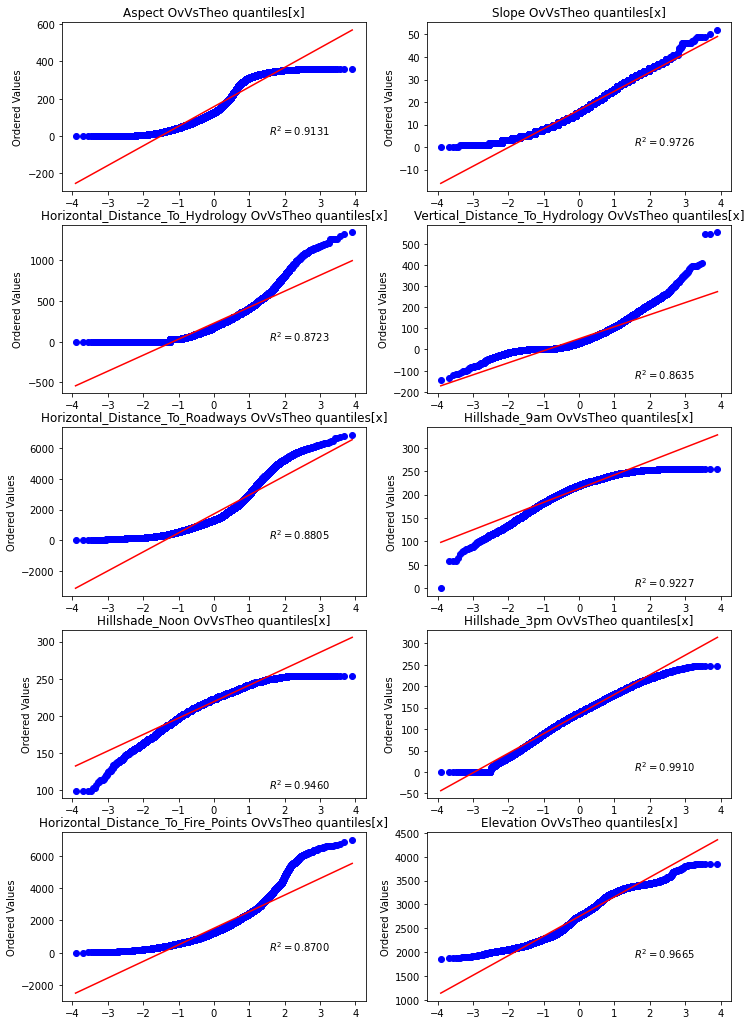

In [43]:
#replot of q-q with fillin nans with 'ffill' method
list_qq_cols=[i for i in df_to_qq.columns]
fig, axs = plt.subplots(5, 2,figsize=(12, 18))
for i in range(len(list_qq_cols)):
    axs = plt.subplot('52'+str(i))
    x = np.array(df_to_qq[list_qq_cols[i]].fillna(method='ffill').values)
    res = stats.probplot(x, plot=plt,rvalue=True)
    axs.set_title(list_qq_cols[i]+' OvVsTheo quantiles[x]')
    axs.set_xlabel('')

plt.savefig('visual_normality_test_qq.png')
plt.show()

## Conclusion
For every column with a $R^2>0.9$, it can be concluded that the distribution is normal. For values below that, the distribution is not normal and the filling will be with the **median**

### Replacing of Categorical values

In [46]:
# the replacing will beging with the 'n' values
df_soil_type=df_train.loc[:,'Wilderness_Area1':'Soil_Type40']=='n'
#replacing of 'y' for 1
df_train.loc[:,'Wilderness_Area1':'Soil_Type40']=df_train.loc[:,'Wilderness_Area1':'Soil_Type40'].where(df_soil_type,1)
#replacing of 'n' for 0
df_soil_type=df_train.loc[:,'Wilderness_Area1':'Soil_Type40']==1
df_train.loc[:,'Wilderness_Area1':'Soil_Type40']=df_train.loc[:,'Wilderness_Area1':'Soil_Type40'].where(df_soil_type,0)

In [47]:
#lets check those columns
df_train.loc[:,'Wilderness_Area1':'Soil_Type40']

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15115,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15116,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
15117,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
15118,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
# cols of train
df_train.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [49]:
# get the type values of every col
df_train.dtypes

Id                                      int64
Elevation                             float64
Aspect                                float64
Slope                                 float64
Horizontal_Distance_To_Hydrology      float64
Vertical_Distance_To_Hydrology        float64
Horizontal_Distance_To_Roadways       float64
Hillshade_9am                         float64
Hillshade_Noon                        float64
Hillshade_3pm                         float64
Horizontal_Distance_To_Fire_Points    float64
Wilderness_Area1                       object
Wilderness_Area2                       object
Wilderness_Area3                       object
Wilderness_Area4                       object
Soil_Type1                             object
Soil_Type2                             object
Soil_Type3                             object
Soil_Type4                             object
Soil_Type5                             object
Soil_Type6                             object
Soil_Type7                        

### Inspect numeric cols

In [50]:
#because ._get_numeric_data().describe.T.iloc['Elevation':] rise an error working with dtype object(really strings), convert to best possible type
df_train=df_train.convert_dtypes()
df_train.dtypes

Id                                    Int64
Elevation                             Int64
Aspect                                Int64
Slope                                 Int64
Horizontal_Distance_To_Hydrology      Int64
Vertical_Distance_To_Hydrology        Int64
Horizontal_Distance_To_Roadways       Int64
Hillshade_9am                         Int64
Hillshade_Noon                        Int64
Hillshade_3pm                         Int64
Horizontal_Distance_To_Fire_Points    Int64
Wilderness_Area1                      Int64
Wilderness_Area2                      Int64
Wilderness_Area3                      Int64
Wilderness_Area4                      Int64
Soil_Type1                            Int64
Soil_Type2                            Int64
Soil_Type3                            Int64
Soil_Type4                            Int64
Soil_Type5                            Int64
Soil_Type6                            Int64
Soil_Type7                            Int64
Soil_Type8                      

In [51]:
# head description of df_train with only numeric data--->not categorical
df_train._get_numeric_data().describe().T.loc['Elevation':'Horizontal_Distance_To_Fire_Points',:]

,count,mean,std,min,25%,50%,75%,max
Elevation,14969.0,2748.987307,417.777253,1863.0,2375.0,2752.0,3103.0,3849.0
Aspect,14983.0,156.686778,110.107630,0.0,65.0,126.0,260.0,360.0
Slope,14982.0,16.498064,8.447134,0.0,10.0,15.0,22.0,52.0
Horizontal_Distance_To_Hydrology,14970.0,227.113494,210.083884,0.0,67.0,180.0,328.5,1343.0
Vertical_Distance_To_Hydrology,14951.0,51.082804,61.308165,-146.0,5.0,32.0,79.0,554.0
Horizontal_Distance_To_Roadways,14973.0,1714.336673,1324.493127,0.0,760.0,1316.0,2271.0,6890.0
Hillshade_9am,14984.0,212.710558,30.539999,0.0,196.0,220.0,235.0,254.0
Hillshade_Noon,14973.0,218.979430,22.799056,99.0,207.0,223.0,235.0,254.0
Hillshade_3pm,14979.0,135.063422,45.884193,0.0,106.0,138.0,167.0,248.0
Horizontal_Distance_To_Fire_Points,14973.0,1512.287584,1100.445355,0.0,731.0,1256.0,1989.0,6993.0


## Inspect target variable

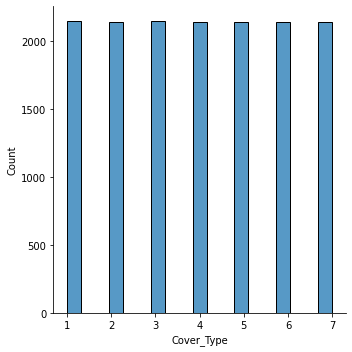

In [52]:
#plot target column (categorical)
sns.displot(df_train['Cover_Type']).savefig('distribution_cover_type.jpg');

### Feature selection
Several methods will be applied, in order to get the best combination of features to train the model.
#### Filter methods: pre-processing step
We will begin with one of the filter methods: **Correlation coefficient or Pearson's correlation**

#### 1. Correlation matrix

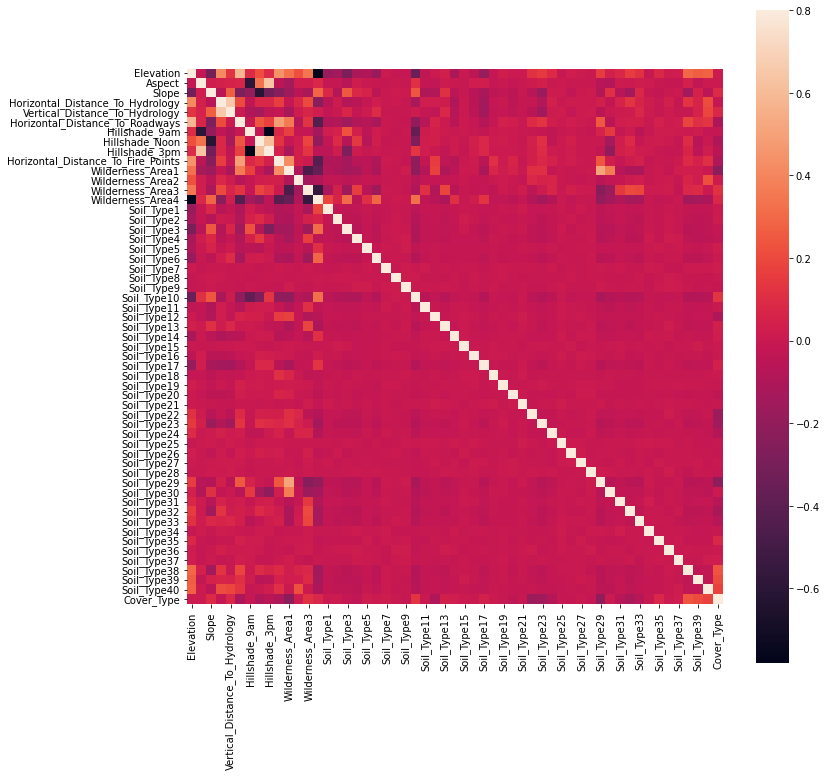

In [53]:
#correlation matrix
corrmat = df_train.corr().loc['Elevation':,'Elevation':]
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corrmat, vmax=.8, square=True);
#save heatmap as .png
f.savefig('forest_cover_corrmat_heatmap.png')

In [54]:
#correlation matrix with numeric variables
list_cols_numeric=list(df_train.corr().loc[ 'Elevation':'Horizontal_Distance_To_Fire_Points','Elevation':'Horizontal_Distance_To_Fire_Points'].columns)
list_index_numeric=list(df_train.corr().loc[ 'Elevation':'Horizontal_Distance_To_Fire_Points','Elevation':'Horizontal_Distance_To_Fire_Points'].index)
list_cols_numeric.append('Cover_Type')
list_index_numeric.append('Cover_Type')

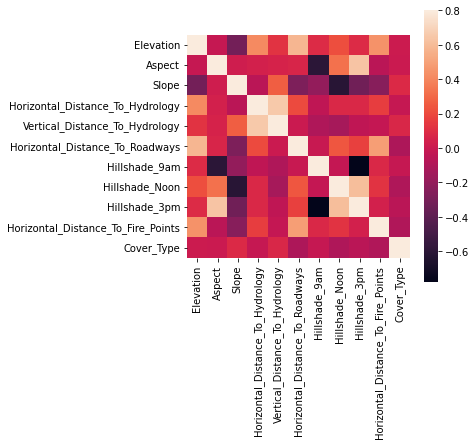

In [55]:
corrmat_numeric=corrmat.loc[list_index_numeric,list_cols_numeric]
f, ax = plt.subplots(figsize=(5, 5))
sns.heatmap(corrmat_numeric, vmax=.8, square=True);
#save heatmap as .png
f.savefig('forest_cover_corrmat_numeric_heatmap.png')

In [56]:
#correlation matrix with categorical variables
list_cols_categorical=list(df_train.corr().loc[ 'Wilderness_Area1':'Soil_Type40','Wilderness_Area1':'Soil_Type40'].columns)
list_index_categorical=list(df_train.corr().loc[ 'Wilderness_Area1':'Soil_Type40','Wilderness_Area1':'Soil_Type40'].index)
list_cols_categorical.append('Cover_Type')
list_index_categorical.append('Cover_Type')

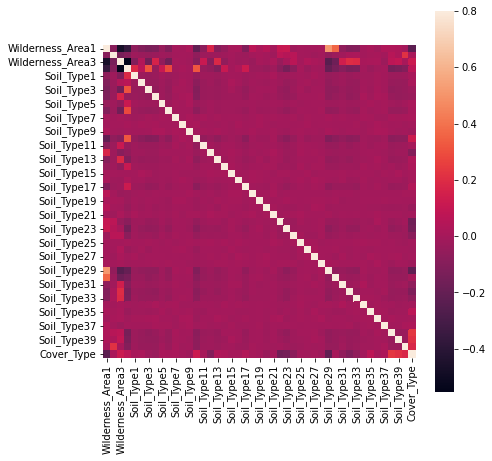

In [57]:
corrmat_categorical=corrmat.loc[list_index_categorical,list_cols_categorical]
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(corrmat_categorical, vmax=.8, square=True);
#save heatmap as .png
f.savefig('forest_cover_corrmat_categorical_heatmap.png')

In [58]:
# get cols with correlation greater than .1 except 'Cover_Type'
most_corr_cols=corrmat['Cover_Type'][corrmat['Cover_Type']>.1]
most_corr_cols

Wilderness_Area3    0.120221
Soil_Type10         0.125688
Soil_Type38         0.232285
Soil_Type39         0.212556
Soil_Type40         0.180346
Cover_Type          1.000000
Name: Cover_Type, dtype: float64

In [59]:
#lets see the maximum correlation
corrmat['Cover_Type'][:'Soil_Type40'].max()

0.23228481504328988

#### Correlation conclusion
Because the maximum correlation is that low, the relation between the target value ```'Cover_Type'``` and the other variables is not **linear** and it is needed to stablish **non-linear** relations.
##### Other feature selection techniques
In order to find those variables and their relation with ```'Cover_Type'```, first ```feature importance``` will be applied with the help of the ```sklearn``` module.

